In [1]:
import os
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

model_name = os.getenv("MODEL_NAME") or "gpt-4o-mini"
model_provider = os.getenv("MODEL_PROVIDER") or "openai"

In [4]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter



In [5]:
urls = [
    "https://finance.naver.com/",
    "https://finance.yahoo.com/",
    "https://finance.daum.net/",
]

docs = [WebBaseLoader(url).load() for url in urls]

docs_list = [item for sublist in docs for item in sublist]

In [59]:
len(docs_list)
print(docs_list)


[Document(metadata={'source': 'https://finance.naver.com/', 'title': '네이버페이 증권', 'language': 'ko'}, page_content='\n\n\n네이버페이 증권\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n메인 메뉴로 바로가기\n본문으로 바로가기\n\n\n\n\n\n\n\n\n\n\n네이버\n\n\n\n\n\n페이\n\n\n\n\n\n\n증권\n\n\n\n\n\n\n증권 종목명·지수명 검색\n\n\n\n\n\n\n\n검색\n\n\n자동완성\n\n\n\n\n\n\n\n@code@\n@txt@\n@market@\n\n@full_txt@\n@in_code@\n@in_name@\n@in_link@\n@in_market@\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\t공모주와 해외 종목은 모바일 페이지로 이동합니다.\n\t\t\t\t\t\t\t\t\t\t\t\n\n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\t현재 자동완성 기능을 사용하고 계십니다.\n\t\t\t\t\t\t\t\t\t\t\t\n\n\n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\t자동완성 기능이 활성화되었습니다.\n\t\t\t\t\t\t\t\t\t\t\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n증권 홈선택됨\n국내증시\n해외증시\n시장지표\n리서치\n뉴스\nMY\n\n\n\n\n\n\n\n\n\n본문시작\n\n오늘의 코스피/코스닥 지수\n2025년 08월 28일 장마감\n코스피 지수 3,196.32 전일대비 상승 9.16 플러스 0.29 퍼센트\n코스닥 지수 798.43 전일대비 하락 3.29 마이너스 0.41 퍼센트\n\n\n\n\n\n최근조회종목\nMY STOCK\n\n\n\n최근 조회종목 리스트\n\n\n\n\n\n\n\n\n\n\n\n\n\n주요뉴스\n\n\n로봇株 뜨자 로보

In [70]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=300,
    chunk_overlap=50,
)
doc_splits = text_splitter.split_documents(docs_list)

vectorstore = Chroma.from_documents(
    documents=doc_splits,
    collection_name='finance',
    embedding=OpenAIEmbeddings(model="text-embedding-3-large"),
)

retriever = vectorstore.as_retriever()

print(retriever.invoke("삼성전자 주가?"))

[Document(metadata={'source': 'https://finance.naver.com/', 'title': '네이버페이 증권', 'language': 'ko'}, page_content='삼성전자\n69,600\n하락 1,000\n\n\n\t\t\t\t-1.42%\n\t\t\t\t\n\n\n\nSK하이닉스\n268,500\n상승 8,500\n\n\n\t\t\t\t+3.27%\n\t\t\t\t\n\n\n\nLG에너지솔루션\n364,000\n하락 9,500\n\n\n\t\t\t\t-2.54%\n\t\t\t\t\n\n\n\n삼성바이오로직스\n1,012,000\n하락 8,000\n\n\n\t\t\t\t-0.78%\n\t\t\t\t\n\n\n\n한화에어로스페이스\n908,000\n상승 1,000\n\n\n\t\t\t\t+0.11%\n\t\t\t\t\n\n\n\n삼성전자우\n56,700\n하락 1,000'), Document(metadata={'language': 'ko', 'source': 'https://finance.naver.com/', 'title': '네이버페이 증권'}, page_content='삼성전자\n69,600\n하락 1,000\n\n\n\t\t\t\t-1.42%\n\t\t\t\t\n\n\n\nSK하이닉스\n268,500\n상승 8,500\n\n\n\t\t\t\t+3.27%\n\t\t\t\t\n\n\n\nLG에너지솔루션\n364,000\n하락 9,500\n\n\n\t\t\t\t-2.54%\n\t\t\t\t\n\n\n\n삼성바이오로직스\n1,012,000\n하락 8,000\n\n\n\t\t\t\t-0.78%\n\t\t\t\t\n\n\n\n한화에어로스페이스\n908,000\n상승 1,000\n\n\n\t\t\t\t+0.11%\n\t\t\t\t\n\n\n\n삼성전자우\n56,700\n하락 1,000'), Document(metadata={'title': '네이버페이 증권', 'language': 'ko', 'source': 'https://

In [71]:
from typing import Annotated, Literal, Sequence, TypedDict 
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

from langchain.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(
    retriever,
    "finance_portal_search",
    "네이버, 야후, 다음의 금융 관련 정보를 검색하고 반환합니다."
)

tools = [retriever_tool]

In [72]:
from typing import Annotated, Literal, Sequence, TypedDict 
from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import tools_condition

def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    검색된 문서가 질문과 관련이 있는지 평가합니다.

    Args:
        state(messages): 현재 대화 상태

    Returns:
        str: 문서의 관련성에 따라 다음 노드 결정 ("generate" | "rewrite")
    """ 
    print("---문서 관련성 평가---")

    class grade(BaseModel):
        """관련성 평가를 위한 이진 점수.""" 
        binary_score: str = Field(description="관련성 점수 'yes' 또는 'no'")

    model = ChatOpenAI(
        model=model_name,
        temperature=0,
        streaming=True,
    )
    
    llm_with_tool = model.with_structured_output(grade)

    prompt = PromptTemplate(
        template="""당신은 사용자 질문에 대한 검색된 문서의 관련성을 평가하는 평가자입니다.
        여기 검색된 문서가 있습니다.:

        {context}

        여기 사용자 질문이 있습니다: {question}

        문서가 사용자 질문과 관련된 키워드 또는 의미를 포함하면 관련성이 있다고 평가하세요.
        문서가 질문과 관련이 있는지 여부를 나타내기 위해 'yes' 또는 'no'로 이진 점수를 주세요.
        """,
        input_variables=["context", "question"],
    )

    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content
    
    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---결정: 문서 관련성 있음---")
        return "generate"
    else:
        print("---결정: 문서 관련성 없음---")
        print(score)
        return "rewrite"
    

In [73]:
def agent(state):
    """
    현재 상태를 기반으로 에이전트 모델을 호출하여 응답을 생성합니다.
    주어진 질문에 따라 검색 도구를 사용하여 검색을 수행하거나 단순히 종료하기로 결정합니다.

    Args:
        state(messages): 현재 대화 상태

    Returns:
        dict: 메시지에 에이전트 응답이 추가된 업데이트된 상태
    """
    print("---에이전트 호출---")
    messages = state["messages"]

    print("에이전트로 전달된 메시지들:")
    for msg in messages:
        print(msg)

    model = ChatOpenAI(
        temperature=0,
        streaming=True,
        model=model_name,
    ).bind_tools(tools)
    response = model.invoke(messages)

    print("에이전트 응답:", response)

    state["messages"].append(response)
    return state

def rewrite(state):
    """
    질문을 재작성(변형)하여 더 나은 질문을 생성합니다. 

    Args:
        state(messages): 현재 상태

    Returns:
        dict: 메시지에 재작성된 질문이 추가된 업데이트된 상태
    """
    print("---질문 재작성---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f"""다음 입력을 보고 근본적인 의도나 의미를 파악해보세요.
            초기 질문은 다음과 같습니다.
            --------
            {question}
            --------
            초기 질문에 대한 답변은 다음과 같습니다.
            --------
            개선된 질문을 만들어 주세요:
            """,
        )
    ]

    model = ChatOpenAI(
        model=model_name,
        temperature=0,
        streaming=True,
    )

    response = model.invoke(msg)

    print("Rewrite 단계에서의 응답:", response)
    state["messages"].append(response)
    return state

In [74]:
def generate(state):
    """
    답변 생성

    Args:
        state(messages): 현재 상태

    Returns:
        dict: 재구성된 질문으로 업데이트된 상태
    """
    print("---답변 생성---")
    messages = state["messages"]
    question = messages[0].content
    
    last_message = messages[-1]
    docs = last_message.content

    prompt = PromptTemplate(
        template = """당신은 질문-답변 작업을 위한 어시스턴트입니다.
        아래 제공된 문맥을 사용하여 질문에 답변해주세요.
        답을 모를 경우 '모르겠습니다'라고 말해주세요. 답변은 최대 3문장으로 간결하게 ㅈ가성하세요.

        질문: {question}
        문맥: {context}
        답변: """, 
        input_variables=["question", "context"],
    )

    llm = ChatOpenAI(
        model=model_name, 
        temperature=0,
        streaming=True,
    )

    rag_chain = prompt | llm | StrOutputParser()
    response = rag_chain.invoke({"question": question, "context": docs})
    
    return {"messages": [response]}

In [75]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode

workflow = StateGraph(AgentState)

workflow.add_node("agent", agent)
retriever = ToolNode([retriever_tool])
workflow.add_node("retriever", retriever)
workflow.add_node("rewrite", rewrite)
workflow.add_node("generate", generate)
workflow.add_edge(START, "agent")

workflow.add_conditional_edges(
    "agent",
    tools_condition,
    {
        # 조건 출력을 그래프 내 노드로 변환, 반환 값: 실행 노드로
        'tools': 'retriever',
        "__end__": 'generate',
    },
)

workflow.add_conditional_edges(
    "retriever",
    grade_documents,
    {
        # 문서 관련성 평가 조건
        'generate': 'generate',
        'rewrite': 'rewrite',
    },
)

workflow.add_edge("rewrite", "agent")
workflow.add_edge("generate", END)

graph = workflow.compile()


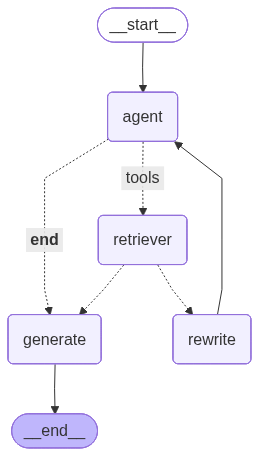

In [76]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [77]:
import pprint 
input = {
    "messages": [
        ("user", "삼성전자 주가?")
    ]
}

for output in graph.stream(input):
    for key, value in output.items():
        pprint.pprint(f"노드 [{key}] 출력 결과:")
        pprint.pprint("---")
        pprint.pprint(value, indent=2, width=80, depth=None)
    pprint.pprint("\n---\n")



---에이전트 호출---
에이전트로 전달된 메시지들:
content='삼성전자 주가?' additional_kwargs={} response_metadata={} id='dbd10c71-2543-41ff-9e51-3c8d8f83ab51'
에이전트 응답: content='' additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_z8bIgDmST9U6BsxXPTG1jJdK', 'function': {'arguments': '{"query":"삼성전자 주가"}', 'name': 'finance_portal_search'}, 'type': 'function'}]} response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'service_tier': 'default'} id='run--3aad3343-2543-46bd-bd64-131959b8c31a-0' tool_calls=[{'name': 'finance_portal_search', 'args': {'query': '삼성전자 주가'}, 'id': 'call_z8bIgDmST9U6BsxXPTG1jJdK', 'type': 'tool_call'}]
'노드 [agent] 출력 결과:'
'---'
{ 'messages': [ HumanMessage(content='삼성전자 주가?', additional_kwargs={}, response_metadata={}, id='dbd10c71-2543-41ff-9e51-3c8d8f83ab51'),
                AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_z8bIgDmST9U6BsxXPTG1jJdK', 'function': {'arguments': '

/Users/jurepi/Work/Study/jo-langchain/.venv/lib/python3.12/site-packages/langchain_openai/chat_models/base.py:1893: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


---결정: 문서 관련성 있음---
'노드 [retriever] 출력 결과:'
'---'
{ 'messages': [ ToolMessage(content='삼성전자\n69,600\n하락 1,000\n\n\n\t\t\t\t-1.42%\n\t\t\t\t\n\n\n\nSK하이닉스\n268,500\n상승 8,500\n\n\n\t\t\t\t+3.27%\n\t\t\t\t\n\n\n\nLG에너지솔루션\n364,000\n하락 9,500\n\n\n\t\t\t\t-2.54%\n\t\t\t\t\n\n\n\n삼성바이오로직스\n1,012,000\n하락 8,000\n\n\n\t\t\t\t-0.78%\n\t\t\t\t\n\n\n\n한화에어로스페이스\n908,000\n상승 1,000\n\n\n\t\t\t\t+0.11%\n\t\t\t\t\n\n\n\n삼성전자우\n56,700\n하락 1,000\n\n삼성전자\n69,600\n하락 1,000\n\n\n\t\t\t\t-1.42%\n\t\t\t\t\n\n\n\nSK하이닉스\n268,500\n상승 8,500\n\n\n\t\t\t\t+3.27%\n\t\t\t\t\n\n\n\nLG에너지솔루션\n364,000\n하락 9,500\n\n\n\t\t\t\t-2.54%\n\t\t\t\t\n\n\n\n삼성바이오로직스\n1,012,000\n하락 8,000\n\n\n\t\t\t\t-0.78%\n\t\t\t\t\n\n\n\n한화에어로스페이스\n908,000\n상승 1,000\n\n\n\t\t\t\t+0.11%\n\t\t\t\t\n\n\n\n삼성전자우\n56,700\n하락 1,000\n\n삼성전자\n69,600\n하락 1,000\n\n\n\t\t\t\t-1.42%\n\t\t\t\t\n\n\n\nSK하이닉스\n268,500\n상승 8,500\n\n\n\t\t\t\t+3.27%\n\t\t\t\t\n\n\n\nLG에너지솔루션\n364,000\n하락 9,500\n\n\n\t\t\t\t-2.54%\n\t\t\t\t\n\n\n\n삼성바이오로직스\n1,012,000\n하락 8,000